<div style="display:fill;
           border: 2px outset orange;
           border-radius: 50px 50px 50px;
           background-color:#35B5AC">

<h1 style="color:white;
          font-size:37px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> SPACESHIP TITANIC SUPERVISED ML PROBLEM 🚀</h1>
</div>

<div style="width:100%;text-align: center;"> <img align=middle src="https://64.media.tumblr.com/74e2a298554852dce3eeb5e9cd3f1858/c231fd82edac3d29-93/s1280x1920/e70e2597aeb3991151793d4e721ec778f2bf47d3.jpg" alt="Heat beating" style="height:600px;margin-top:3rem;"> </div>


<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:28px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> TABLE OF CONTENTS 📚</h1>
</div>

*  1. [IMPORTING LIBRARIES AND DATASET](#section-one)
*  2. [CHECKING FOR BALANCE OF DATASET AND ALSO REMOVING REDUNDANT FEATURES ](#section-two)
*  3. [SEGREGATION OF NUMERICAL AND CATEGORICAL FEATURES FROM DATASET](#section-three)
*  4. [EXPOLATORY DATA ANAYLSIS (EDA)](#section-four)
    - 4.1 [OUTLIER DETECTION](#subsection-one)
        - 4.1.1 [Method 1: CHECKING SKEWNESS OF ALL NUMERICAL FEATURES](#subsubsection-one)
        - 4.1.2 [Method 2: PLOTTING ALL NUMERICAL FEATURES](#subsubsection-two)
        - 4.1.3 [METHOD 3: PERFORMING SHAPIRO WILK TEST](#subsubsection-three)
        - 4.1.4 [METHOD 4: PERFORMING K2 NORMALITY TEST](#subsubsection-four)
    - 4.2 [EDA THROUGH VISUALIZATION USING SEABORN](#subsection-two)
        - 4.2.1 [UNIVARIATE ANALYSIS](#uni-one)
        - 4.2.2 [BIVARIATE ANALYSIS](#bi-two)
        - 4.2.3 [INTERACTION WITH TARGET VARIABLE](#inter-three)
    - 4.3 [COMPARISON OF RESULTS OF NON SCALED TO SCALED FEATURES](#subsection-three)
*  5. [DATA PREPROCESSING](#section-five)
    - 5.1 [NULL AND DUPLICATED DATA CHECK](#sub-one)
    - 5.2 [DATA IMPUTATION](#sub-two)
*  6. [FEATURE ENGINEERING](#section-six)
*  7. [DATA TRANSFORMATION USING ONE HOT ENCODING](#section-seven)
*  8. [CORRELATION MATRIX](#section-eight)
*  9. [FEATURE EXTRACTION](#section-nine)
    - 9.1 [INTRINSIC METHOD - FEATURE IMPORTANCE THROUGH RANDOM FOREST](#fe-one)
    - 9.2 [WRAPPER METHOD](#fe-two)
* 10. [FEATURE SELECTION](#section-ten)
* 11. [HYPERPARAMETER TUNING](#section-eleven)
* 12. [MODEL EVALUATION](#section-twelve)
* 13. [FINAL MODEL CREATION AND EXPORTING RESULTS](#section-thirteen)

<a id="section-one"></a>


<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> IMPORTING LIBRARIES AND DATASET </h1>
</div>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.preprocessing import PowerTransformer,QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold,StratifiedKFold,KFold
from sklearn.model_selection import cross_val_score
import optuna
import time
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn.metrics import mean_squared_error,log_loss,r2_score
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [7]:
full_train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [8]:
train_data = full_train_data.drop('Transported',axis=1)

<a id="section-two"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> CHECKING FOR BALANCE OF DATASET AND ALSO REMOVING REDUNDANT FEATURES </h1>
</div>

In [9]:
for i in train_data.columns:
    print(train_data[i].value_counts())
    print("*"*100)

0001_01    1
6136_01    1
6141_01    1
6139_06    1
6139_05    1
          ..
3126_01    1
3124_03    1
3124_02    1
3124_01    1
9280_02    1
Name: PassengerId, Length: 8693, dtype: int64
****************************************************************************************************
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
****************************************************************************************************
False    5439
True     3037
Name: CryoSleep, dtype: int64
****************************************************************************************************
G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64
****************************************************************************************************
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destina

In [10]:
# Checking whether the Dataset is Balanced or not
print(full_train_data['Transported'].value_counts())

True     4378
False    4315
Name: Transported, dtype: int64


#### Observations
1. It is premature to remove any feature at this stage of Model Building so going forward
2. The dataset is Balanced

<a id="section-three"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> SEGREGATION OF NUMERICAL AND CATEGORICAL FEATURES FROM DATASET </h1>
</div>

In [11]:
categorical_features = []
numerical_features = []
for i in train_data.columns:
    if train_data[i].dtype == 'O':
        categorical_features.append(i)
    elif train_data[i].dtype == 'float' or train_data[i].dtype == 'int':
        numerical_features.append(i)
        
        
print(categorical_features)
print(numerical_features)

['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


<a id="section-four"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> EXPOLATORY DATA ANALYSIS (EDA)</h1>
</div>

<a id="subsection-one"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:20px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">OUTLIER DETECTION </h1>
</div>

In [12]:
train_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


<a id="subsubsection-one"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:18px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">METHOD 1: CHECKING SKEWNESS OF ALL NUMERICAL FEATURES</h1>
</div>

In [13]:
for i in numerical_features:
    print("Numerical feature : {0}, Skewness: {1}".format(i,train_data[i].skew()))
    print("*"*60)

Numerical feature : Age, Skewness: 0.41909658301471536
************************************************************
Numerical feature : RoomService, Skewness: 6.333014062092135
************************************************************
Numerical feature : FoodCourt, Skewness: 7.102227852514122
************************************************************
Numerical feature : ShoppingMall, Skewness: 12.62756203889759
************************************************************
Numerical feature : Spa, Skewness: 7.63601988471242
************************************************************
Numerical feature : VRDeck, Skewness: 7.819731592048683
************************************************************


#### Observation

As we see 'Age' is not Skewed but most of those Numerical features are skewed but we will furthur continue our analysis.

<a id="subsubsection-two"></a>
<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:18px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">METHOD 2 : PLOTTING ALL NUMERICAL FEATURES</h1>
</div>

## HIST PLOT(KDE)

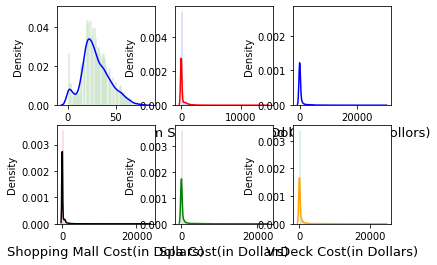

In [14]:
fig, axes = plt.subplots(2, 3)
for i in range(len(numerical_features)):
    sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [18, 15]})
    sns.distplot(train_data[numerical_features[i]],color='green',kde_kws={'color':'blue'},bins=100,ax=axes[0,0]).set_xlabel('Age', fontsize = 13)
    sns.distplot(train_data[numerical_features[i+1]],color='blue',kde_kws={'color':'red'},bins=100,ax=axes[0,1]).set_xlabel('Room Service Cost(in Dollars)', fontsize = 13)
    sns.distplot(train_data[numerical_features[i+2]],color='orange',kde_kws={'color':'blue'},bins=100,ax=axes[0,2]).set_xlabel('Food Court Cost(in Dollors)',fontsize = 13)
    sns.distplot(train_data[numerical_features[i+3]],color='red',kde_kws={'color':'black'},bins=100,ax=axes[1,0]).set_xlabel('Shopping Mall Cost(in Dollars)',fontsize = 13)
    sns.distplot(train_data[numerical_features[i+4]],color='brown',kde_kws={'color':'green'},bins=100,ax=axes[1,1]).set_xlabel('Spa Cost(in Dollars)',fontsize = 13)
    sns.distplot(train_data[numerical_features[i+5]],color='teal',kde_kws={'color':'orange'},bins=100,ax=axes[1,2]).set_xlabel('VrDeck Cost(in Dollars)',fontsize = 13)
    plt.show()
    break


#### Observations

1. From here we see "Age" is almost Normally distribued but all other features are skewed but not necessarily need for transformation.
2. Going forward for next statistics test.


## BOXPLOT

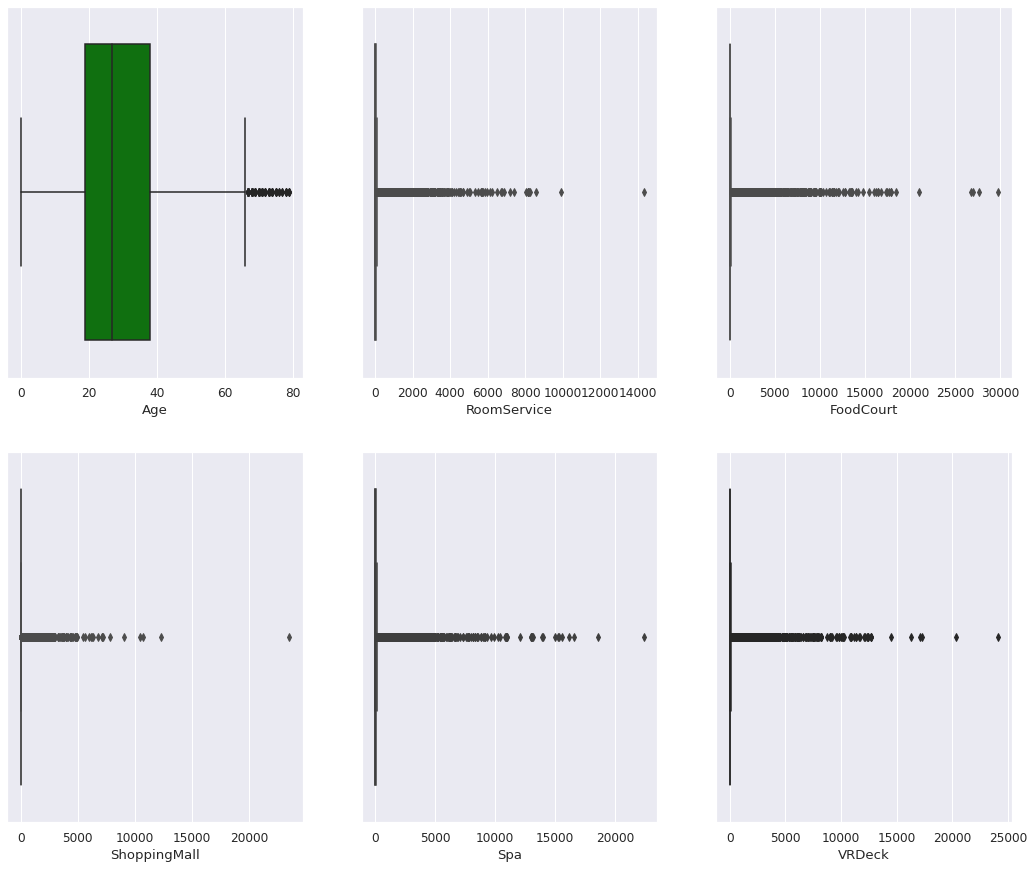

In [15]:
for i in range(len(numerical_features)):
    fig, axes = plt.subplots(2, 3)
    sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [20, 18]})
    sns.boxplot(train_data[numerical_features[i]],color='green',ax=axes[0,0])
    sns.boxplot(train_data[numerical_features[i+1]],color='blue',ax=axes[0,1])
    sns.boxplot(train_data[numerical_features[i+2]],color='orange',ax=axes[0,2])
    sns.boxplot(train_data[numerical_features[i+3]],color='red',ax=axes[1,0])
    sns.boxplot(train_data[numerical_features[i+4]],color='brown',ax=axes[1,1])
    sns.boxplot(train_data[numerical_features[i+5]],color='teal',ax=axes[1,2]);
    break
    

#### Observation

Majority of data points of all numerical features lie outside of Inter Quantile Range.

<a id="subsubsection-three"></a>
<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:18px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">METHOD 3: PERFORMING SHAPIRO WILK TEST</h1>
</div>

In [16]:
for i in numerical_features:
    print("Feature Name : {0}  ,  p-value:  {1}".format(i,shapiro(train_data[i])[1]))


Feature Name : Age  ,  p-value:  1.0
Feature Name : RoomService  ,  p-value:  1.0
Feature Name : FoodCourt  ,  p-value:  1.0
Feature Name : ShoppingMall  ,  p-value:  1.0
Feature Name : Spa  ,  p-value:  1.0
Feature Name : VRDeck  ,  p-value:  1.0


#### Observations

1. From here we can see all Numerical features are showing as Gaussian distribution.
2. We go forward for more Outlier detection and Normality Test.

<a id="subsubsection-four"></a>
<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:18px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">METHOD 4: PERFORMING K2 NORMALITY TEST</h1>
</div>

In [17]:
for i in numerical_features:
    print("Feature Name : {0}  ,  p-value:  {1}".format(i,normaltest(train_data[i],nan_policy='omit')[1]))
    

Feature Name : Age  ,  p-value:  1.6975695282745247e-51
Feature Name : RoomService  ,  p-value:  0.0
Feature Name : FoodCourt  ,  p-value:  0.0
Feature Name : ShoppingMall  ,  p-value:  0.0
Feature Name : Spa  ,  p-value:  0.0
Feature Name : VRDeck  ,  p-value:  0.0


#### Observation
From this test we can see all numerical features are considered as Not Gaussian as p-value is < 0.05 so we reject Null Hypothesis which states "All Features are Gaussian/Normal Distributed"

### OBSERVATIONS FOR OUTLIER DETECTION 📌
#####  1. From all 4 test we found that all numerical features contain few outliers and are not Gaussian/Normal distributed.
#####  2. Now, we formulate new features using existing features for better understanding of data.

<a id="subsection-two"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:20px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">EDA THROUGH VISUALIZATION USING SEABORN</h1>
</div>

<a id="uni-one"></a>
<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:18px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">UNIVARIATE ANALYSIS</h1>
</div>

## KDE PLOT

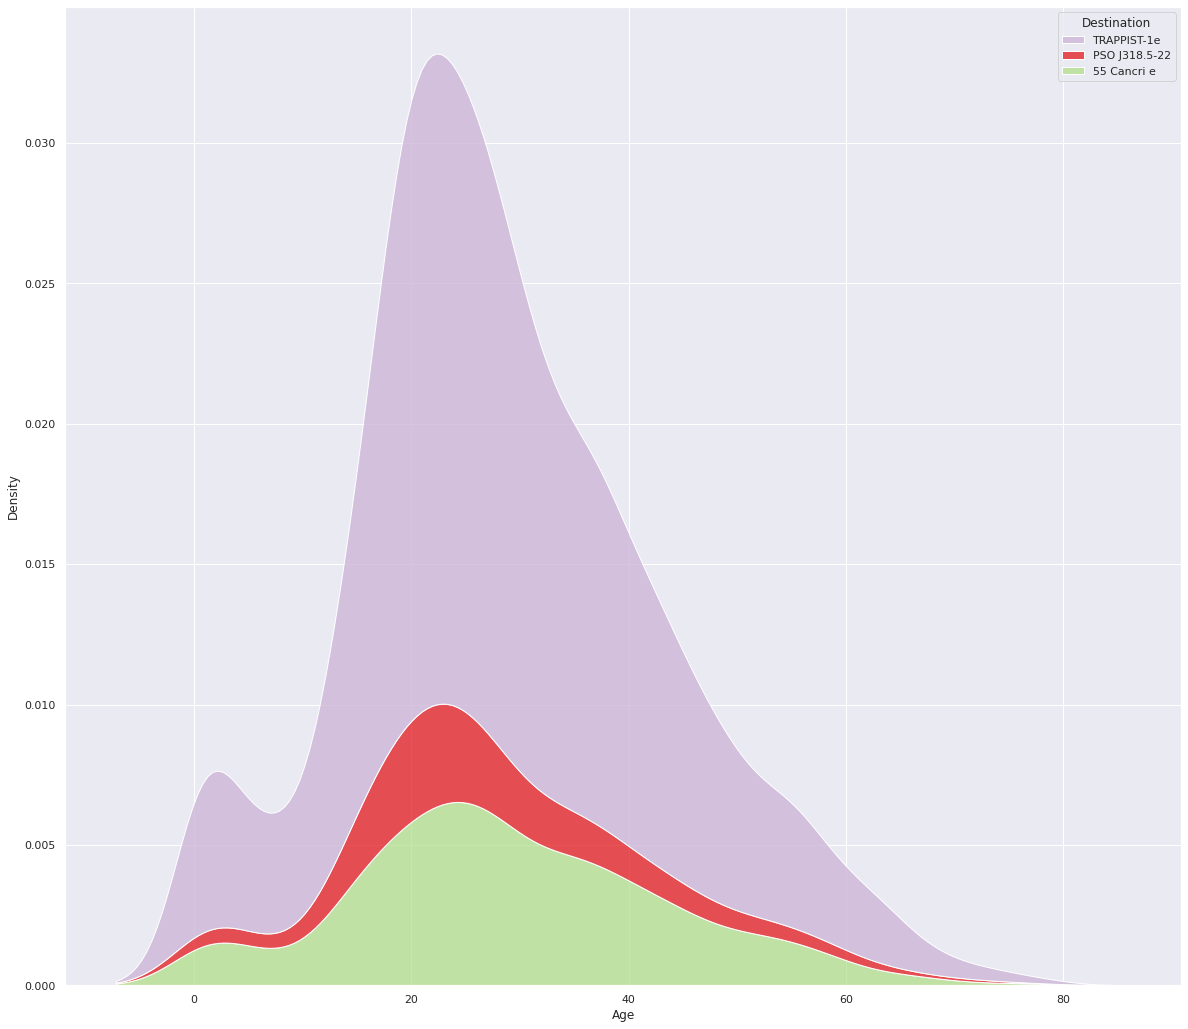

In [18]:
sns.set_theme(style='darkgrid')
sns.kdeplot(data=train_data,x = 'Age',hue = 'Destination',multiple='stack',palette='Paired_r');

#### Observation
Majority of People from all age groups are going to "TRAPPIST-1e" Planet

## COUNTPLOT - Relation Plot

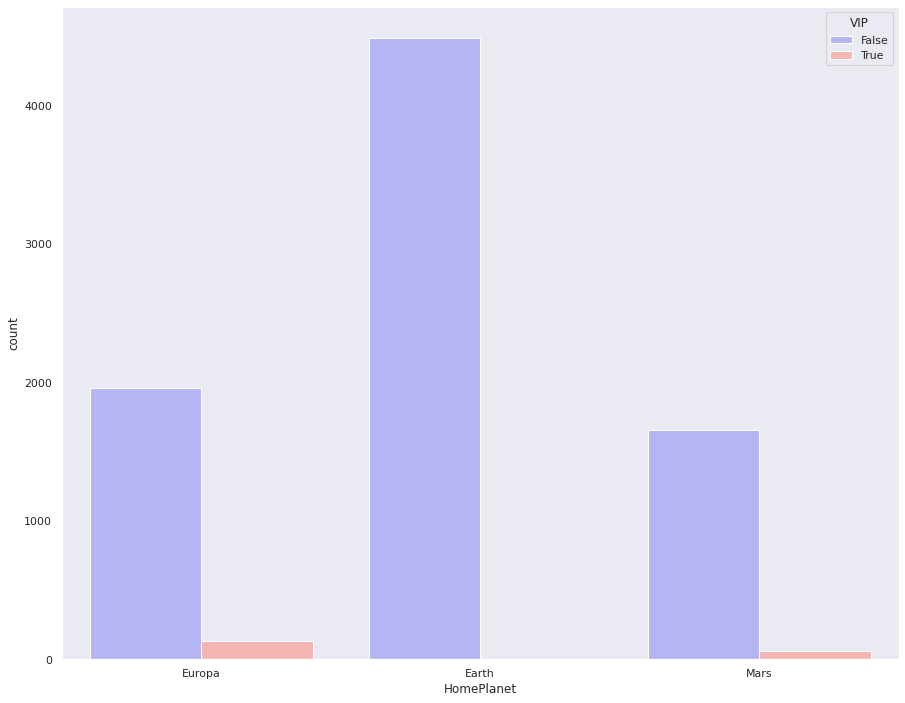

In [19]:
sns.set_theme(style='dark',rc={"figure.figsize": [15, 12]})
sns.countplot(train_data['HomePlanet'],hue=train_data['VIP'],palette='bwr');

#### Observation
Majority of passengers from all three base location are mostly not VIPs.

<a id="bi-two"></a>
<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:18px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">BIVARIATE ANALYSIS</h1>
</div>

## BARPLOT

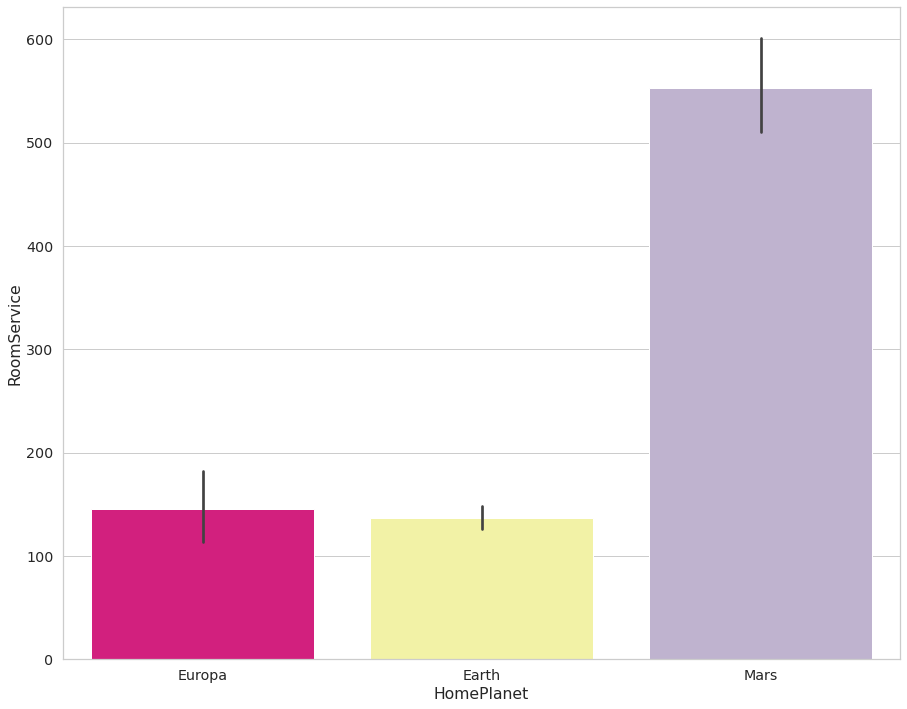

In [20]:
sns.set(palette='rainbow',font_scale=1.3,style = 'whitegrid',rc={"figure.figsize": [15, 12]})
sns.barplot(train_data['HomePlanet'],train_data['RoomService'],palette='Accent_r');

#### Observation
The people having "Mars" as permanent residence are paying highest to RoomService on Spaceship


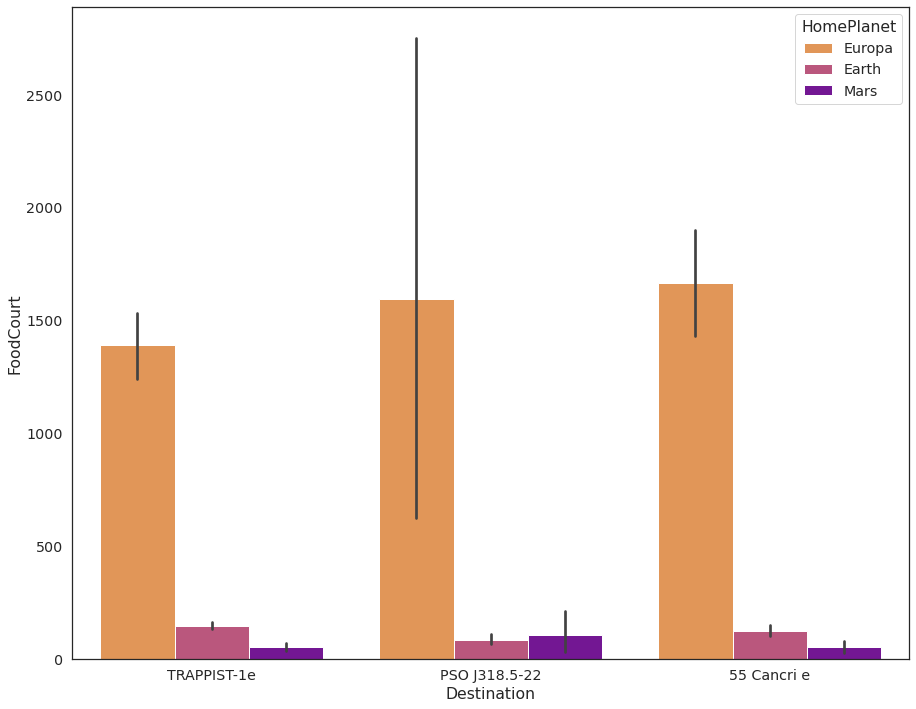

In [21]:
sns.set(palette='rainbow',font_scale=1.3,style = 'white',rc={"figure.figsize": [15, 12]})
sns.barplot(x =train_data['Destination'],y = train_data['FoodCourt'],hue=train_data['HomePlanet'],palette='plasma_r');

#### Observation 
The people having "Europa" as permanent residence("HomePlanet") are paying highest on FoodCourt in Spaceship whether they are travelling to any of the 3 Destination Planets. 

## SCATTER PLOT

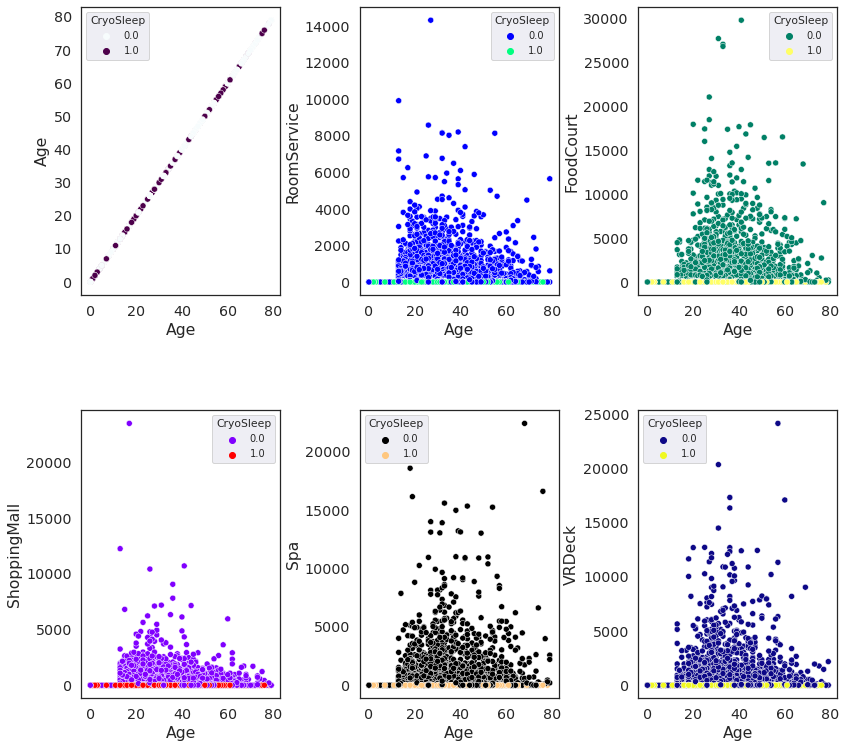

In [22]:
for  i in range(len(numerical_features)):
    fig, axes = plt.subplots(2, 3)
    plt.subplots_adjust(left=0.1,bottom=0.1,right=0.8,top=0.9,wspace=0.4,hspace=0.4)
    sns.set(font_scale=0.9,style = 'darkgrid',rc={"figure.figsize": [22, 20]})
    sns.scatterplot(train_data["Age"],train_data[numerical_features[i]],hue=train_data['CryoSleep'],ax = axes[0,0],palette='BuPu')
    sns.scatterplot(train_data["Age"],train_data[numerical_features[i+1]],hue=train_data['CryoSleep'],ax = axes[0,1],palette='winter')
    sns.scatterplot(train_data["Age"],train_data[numerical_features[i+2]],hue=train_data['CryoSleep'],ax= axes[0,2],palette='summer')
    sns.scatterplot(train_data["Age"],train_data[numerical_features[i+3]],hue=train_data['CryoSleep'],ax = axes[1,0],palette='rainbow')
    sns.scatterplot(train_data["Age"],train_data[numerical_features[i+4]],hue=train_data['CryoSleep'],ax = axes[1,1],palette='copper')
    sns.scatterplot(train_data["Age"],train_data[numerical_features[i+5]],hue=train_data['CryoSleep'],ax = axes[1,2],palette='plasma')
    break;

#### Observations

1. All passengers of Any Age Group who is in CryoSleep has 
2. Food Court Bill   - 0
3. Room Service Bill - 0
4. Spa Bill          - 0
5. ShoppingMall Bill - 0
6. VRDeck Bill       - 0

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


<a id="inter-three"></a>
<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:18px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">INTERACTION WITH TARGET VARIABLE</h1>
</div>

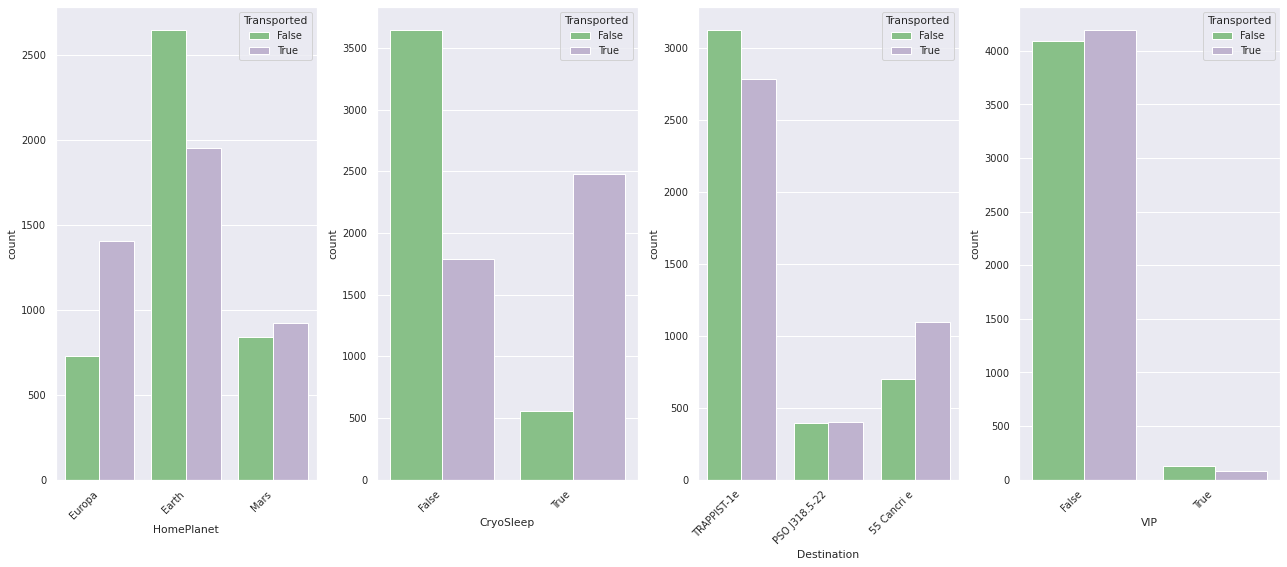

In [24]:
# Code Reference - https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f

cols = 4
rows = 1
fig = plt.figure(figsize= (18,8))
all_cats = train_data.select_dtypes(include='object')
cat_cols = all_cats.columns[all_cats.nunique() < 10]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=train_data[col], ax=ax,palette='Accent',hue=full_train_data['Transported'])
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()


### OBSERVATIONS 📌
##### From these Plots its evident that :-
##### 1. Passengers having "Earth" as base location are less transported than who all are transported from "Earth" on final destination to which they are headed.
##### 2. Passengers who are in 'CryoSleep' are more likely to be transported to destination planets rather than those who are not in CryoSleep.
##### 3. Highest number of passengers are travelling to "TRAPPIST-1e" planet and almost all equal number of passengers are transported and not transported.
##### 4. Majority of travelling passengers are not 'VIP' and almost similar number of passengers who are not VIP are being transported and not transported.

In [25]:
train_data.head(6)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews


<a id="subsection-three"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:20px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">COMPARISON OF RESULTS OF NON SCALED TO SCALED FEATURES</h1>
</div>

### Visualizing the results from Quantile Transformer and Log/Power Transformer(Yeo - Johnson).

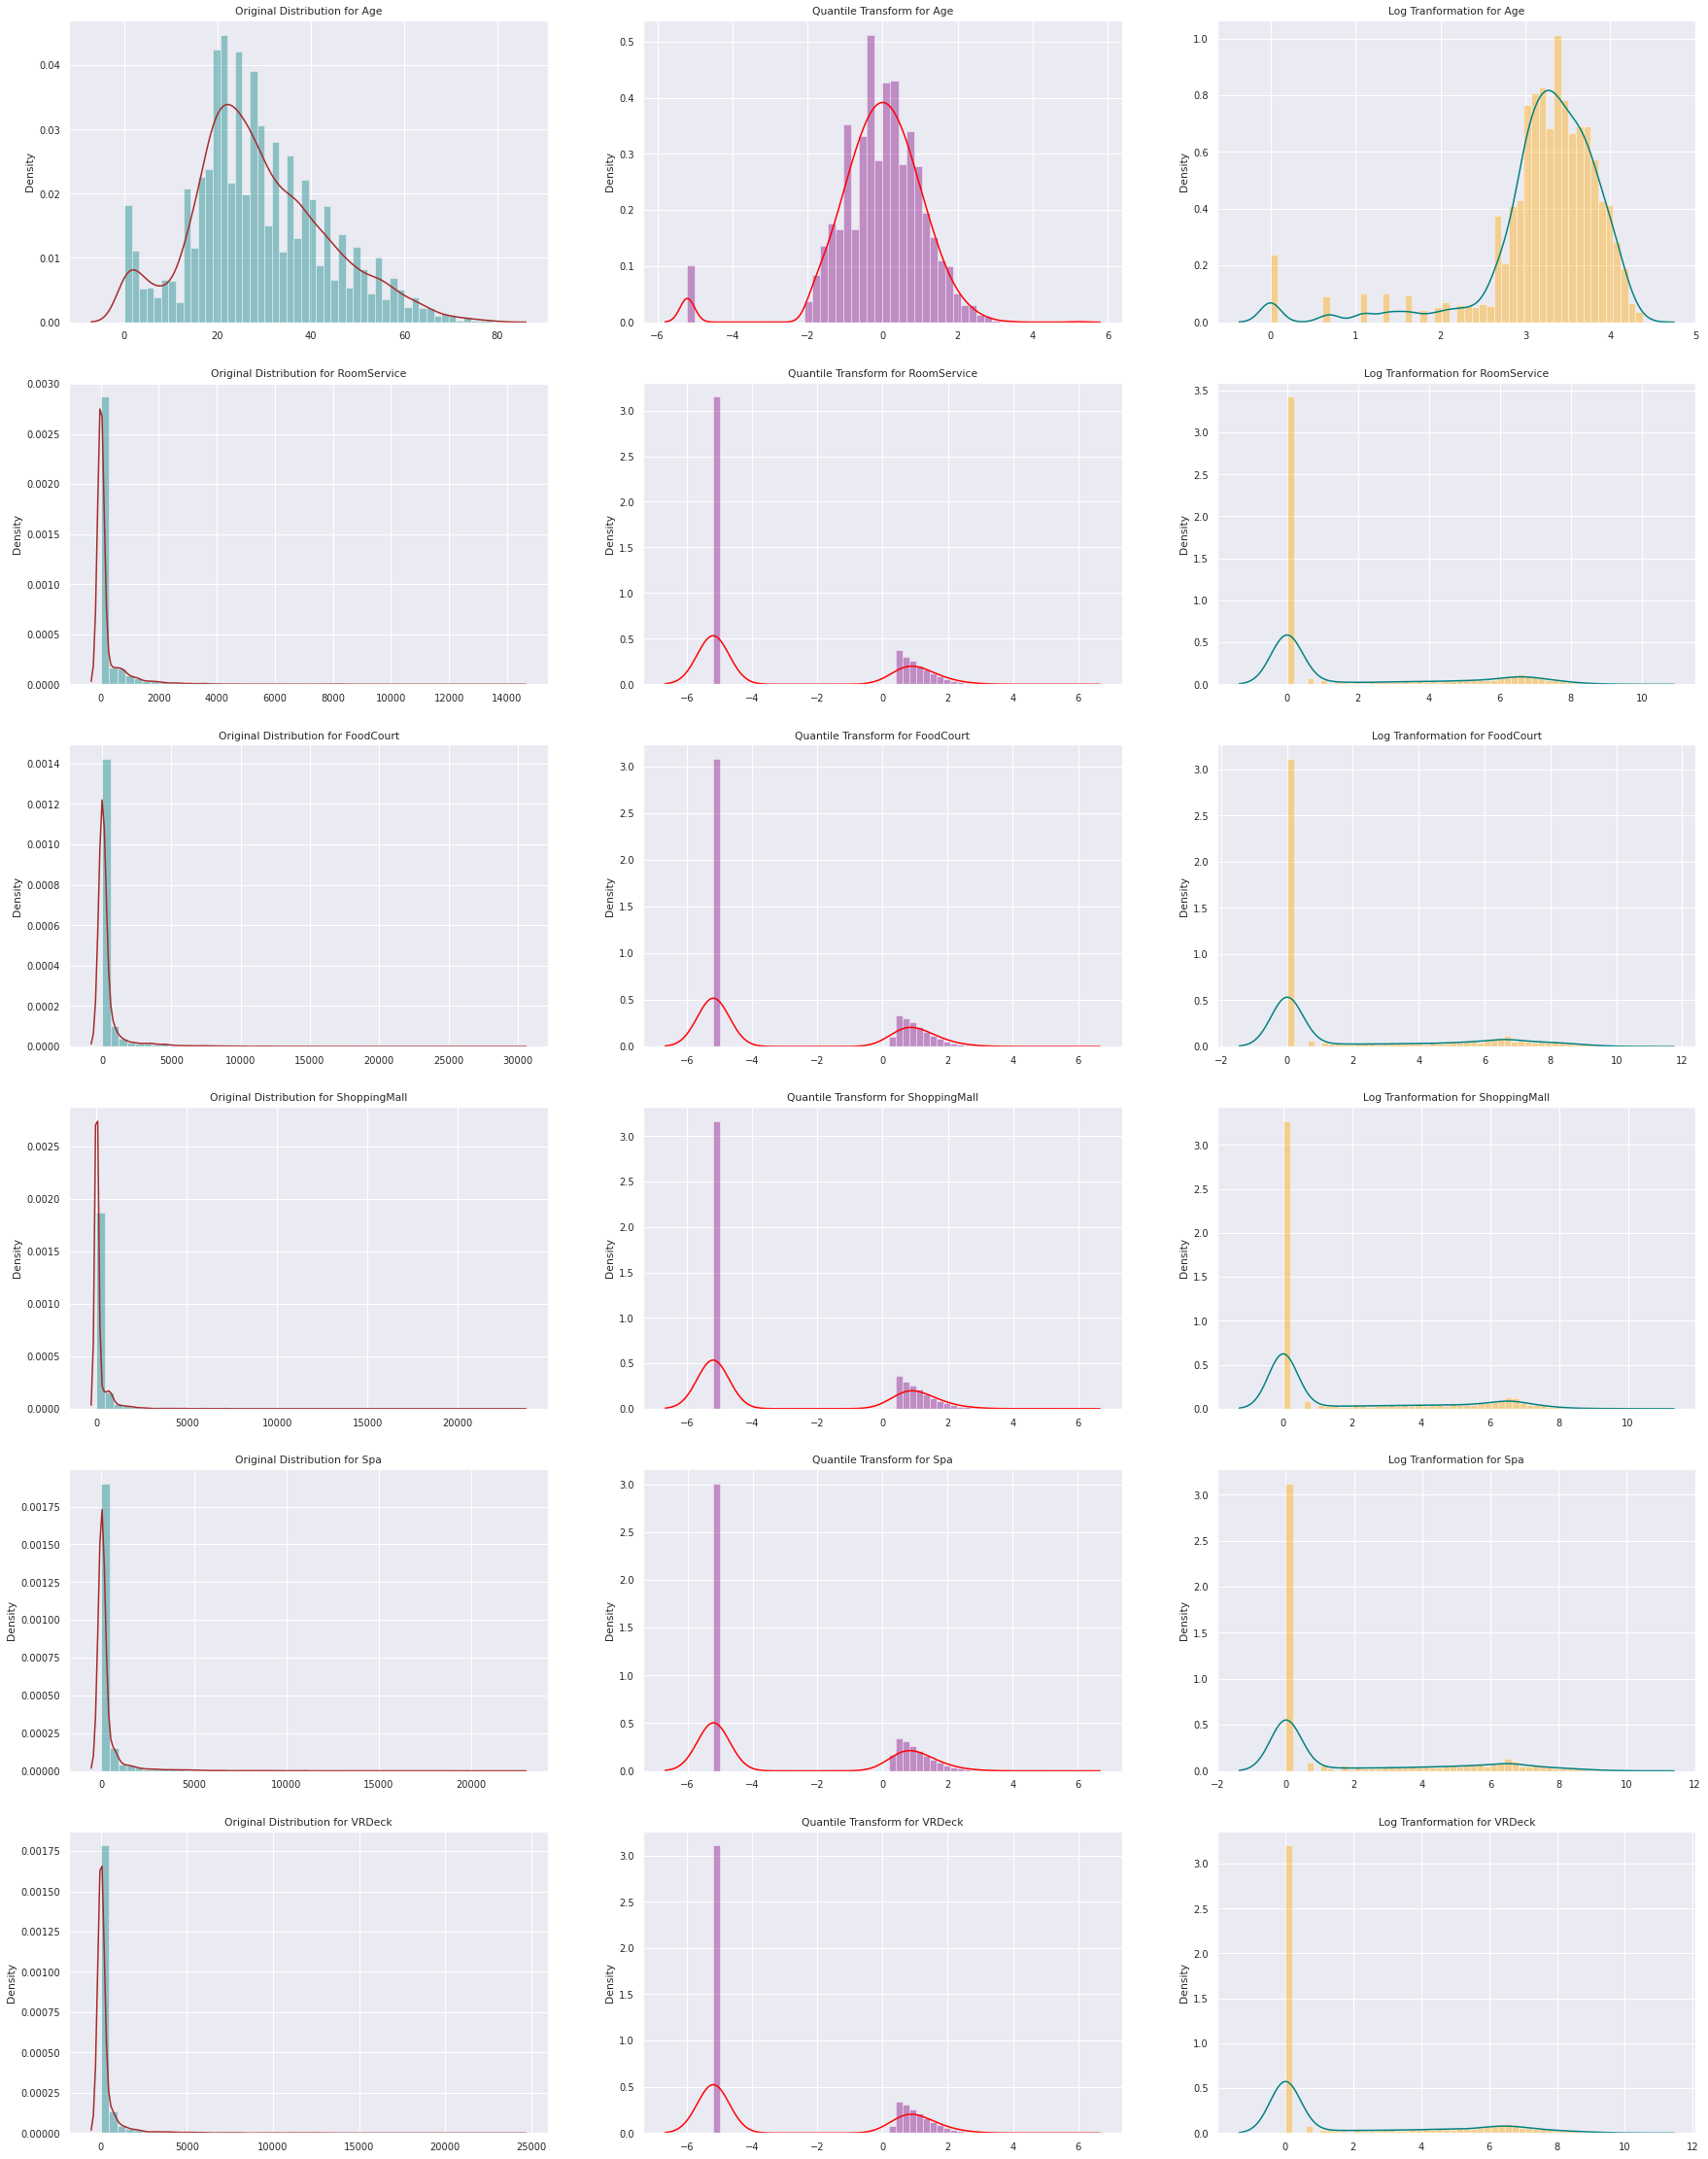

In [26]:
def test_transformers(numerical_features):
    pt = PowerTransformer(method='yeo-johnson')
    qt = QuantileTransformer(output_distribution='normal')    
    fig = plt.figure(figsize=(30,40))
    j = 1
    for i in numerical_features:
        array = np.array(train_data[i]).reshape(-1, 1)
        #y = pt.fit_transform(array)
        y = np.log(array+1)
        x = pd.DataFrame(qt.fit_transform(array))
        plt.subplot(6,3,j)
        sns.distplot(array, bins = 50, kde = True,color='teal',kde_kws={'color':'brown'})
        plt.title(f"Original Distribution for {i}")
        plt.subplot(6,3,j+1)
        sns.distplot(x, bins = 50, kde = True,color='purple',kde_kws={'color':'red'})
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(6,3,j+2)
        sns.distplot(y, bins = 50, kde = True,color='orange',kde_kws={'color':'teal'})
        plt.title(f"Log Tranformation for {i}")
        j += 3
        
test_transformers(numerical_features)

#### OBSERVATIONS 
1. Power transformer i.e yeo-johnson performs better than BOX-COX Transform as it can handle -ve values also.
2. Quantile Transformer is performing better than Log Transform and Yeo-Johnson so taking it as our main Feature Transformer.
3. We are not taking log transform here cause Quantile transformer is giving better results than all others.

In [27]:
# quant_trans = QuantileTransformer(output_distribution='normal')
# for i in numerical_features:
#     quant = quant_trans.fit(np.array(train_data[i]).reshape(-1,1))
#     train_data[i] = quant.transform(np.array(train_data[i]).reshape(-1,1))
#     test_data[i] = quant.transform(np.array(test_data[i]).reshape(-1,1))

### OBSERVATIONS 📌
##### 1. Here we compared final results in a separated local Jupyter Notebook in which unscaled features to the scaled features using Quantile Transformer.
##### 2. In the end we get that unscaled features are performing better in comparison to scaled features cause ensembles does handle unscaled data better than any other distance based algorithms

<a id="section-five"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> DATA PREPROCESSING </h1>
</div>

 <a id="sub-one"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:20px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">NULL AND DUPLICATE DATA CHECK</h1>
</div>

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64
**************************************************
Percentage of missing data points :  26.7342 %


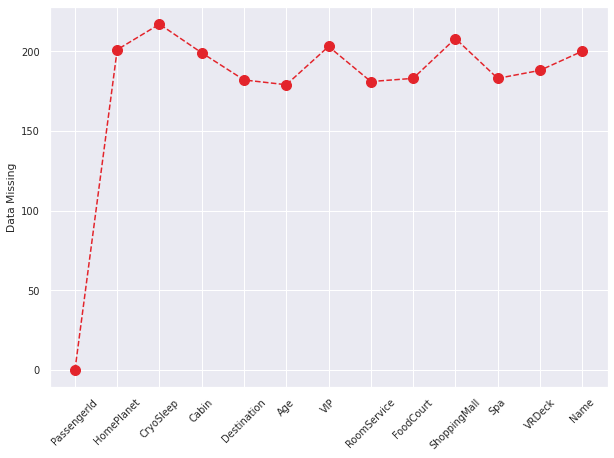

In [28]:
print(train_data.isnull().sum())
print("*"*50)
print('Percentage of missing data points : ',((train_data.isnull().sum().sum()*100)/train_data.shape[0]).round(4),"%")
plt.figure(figsize = (10,7))
plt.plot(train_data.isnull().sum(),color='#E3242B', marker='o', linestyle='dashed',linewidth=1.5, markersize=10)
plt.xticks(rotation = 45)
plt.ylabel('Data Missing')
plt.show()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
**************************************************
Percentage of missing data points :  26.1164 %


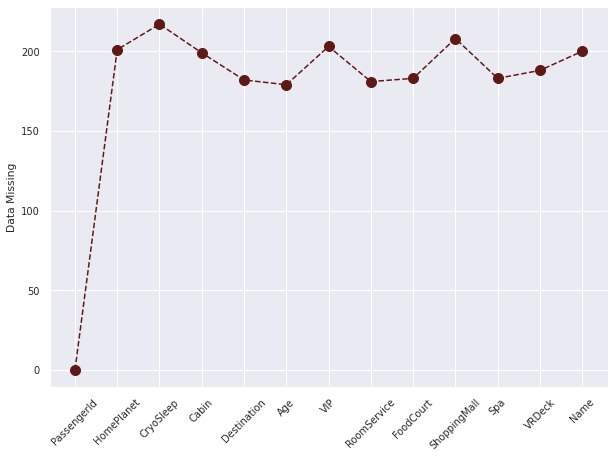

In [29]:
print(test_data.isnull().sum())
print("*"*50)
print('Percentage of missing data points : ',((test_data.isnull().sum().sum()*100)/test_data.shape[0]).round(4),"%")
plt.figure(figsize = (10,7))
plt.plot(train_data.isnull().sum(),color='#5E1916', marker='o', linestyle='dashed',linewidth=1.5, markersize=10)
plt.xticks(rotation = 45)
plt.ylabel('Data Missing')
plt.show()

In [30]:
for i in train_data.columns:
    print('Percentage of Missing values in Training data in Feature {0} : {1}'.format(i,((train_data[i].isnull().sum().sum()*100)/(train_data[i].shape[0])).round(4)),'%')

Percentage of Missing values in Training data in Feature PassengerId : 0.0 %
Percentage of Missing values in Training data in Feature HomePlanet : 2.3122 %
Percentage of Missing values in Training data in Feature CryoSleep : 2.4963 %
Percentage of Missing values in Training data in Feature Cabin : 2.2892 %
Percentage of Missing values in Training data in Feature Destination : 2.0936 %
Percentage of Missing values in Training data in Feature Age : 2.0591 %
Percentage of Missing values in Training data in Feature VIP : 2.3352 %
Percentage of Missing values in Training data in Feature RoomService : 2.0821 %
Percentage of Missing values in Training data in Feature FoodCourt : 2.1051 %
Percentage of Missing values in Training data in Feature ShoppingMall : 2.3927 %
Percentage of Missing values in Training data in Feature Spa : 2.1051 %
Percentage of Missing values in Training data in Feature VRDeck : 2.1627 %
Percentage of Missing values in Training data in Feature Name : 2.3007 %


In [31]:
print(train_data[train_data.duplicated()])
print(test_data[test_data.duplicated()])

# There is no duplicated data present in dataset

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name]
Index: []
Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name]
Index: []


<a id="sub-two"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:20px;
          font-family:sans-serif;
          letter-spacing:0.9px;
           text-align:center">DATA IMPUTATION</h1>
</div>

In [32]:
my_imputer_mean = SimpleImputer(strategy='mean')
my_imputer_mode = SimpleImputer(strategy='most_frequent')

In [33]:
for i in train_data.columns:
    if train_data[i].dtype == 'O':
        imp_mode = my_imputer_mode.fit(np.array(train_data[i]).reshape(-1, 1))
        train_data[i] = imp_mode.transform(np.array(train_data[i]).reshape(-1, 1))
        test_data[i] = imp_mode.transform(np.array(test_data[i]).reshape(-1, 1))
    elif train_data[i].dtype == 'float' or train_data[i].dtype == 'int':
        imp_mean = my_imputer_mean.fit(np.array(train_data[i]).reshape(-1, 1))
        train_data[i] = imp_mean.transform(np.array(train_data[i]).reshape(-1, 1))
        test_data[i] = imp_mean.transform(np.array(test_data[i]).reshape(-1, 1))

### OBSERVATIONS 📌
##### 1. Here we compared results of Imputation using 'mean','median','IterativeImputer' , Constant value and 'KNNImputer' and in the end we get BEST final results using strategy of 'mean' or 'IterativeImputer' of which either can be choosen so we took 'mean' as the Imputation strategy for Numerical features.
##### 2. We took 'most_frequent' Imputation technique for categorical features.

In [34]:
print(train_data.isnull().sum())
print(" ")
print("*"*30)
print(" ")
print(test_data.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64
 
******************************
 
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64


<a id="section-six"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> FEATURE ENGINEERING </h1>
</div>

#### Expanding "PassengerId" feature and creating 2 new features

In [35]:
train_data[['Group_number','Group_size']] = train_data['PassengerId'].str.split('_',expand = True).astype(int)
test_data[['Group_number','Group_size']] = test_data['PassengerId'].str.split('_',expand = True).astype(int)

#### Expanding "Cabin" feature and creating 3 new features

In [36]:
train_data[['Cabin_deck','Cabin_num','Cabin_side']] = train_data['Cabin'].str.split('/',expand = True)
train_data['Cabin_num'] = train_data['Cabin_num'].astype(int)


test_data[['Cabin_deck','Cabin_num','Cabin_side']] = test_data['Cabin'].str.split('/',expand = True)
test_data['Cabin_num'] = test_data['Cabin_num'].astype(int)

#### Formulating new feature "Total Expense" 

In [37]:
train_data['TotalExpense'] = train_data['RoomService']+train_data['FoodCourt']+train_data['ShoppingMall']+train_data['Spa']+train_data['VRDeck']
test_data['TotalExpense'] = test_data['RoomService']+test_data['FoodCourt']+test_data['ShoppingMall']+test_data['Spa']+test_data['VRDeck']

#### Formulating new feature "No money spend"

In [38]:
train_data['No_money_spend'] = np.where(train_data['TotalExpense']==0.0,1,0).astype(int)
test_data['No_money_spend'] = np.where(test_data['TotalExpense']==0.0,1,0).astype(int)

#### Formulating new feature "Alone_passenger" from First and Last Names Features

In [39]:
train_data[['First_name','Last_name']] = train_data['Name'].str.split(" ",expand = True)
test_data[['First_name','Last_name']] = test_data['Name'].str.split(" ",expand = True)

In [40]:
train_data['Alone_passenger'] = np.where(train_data['Last_name'].duplicated(),0,1).astype(int)
test_data['Alone_passenger'] = np.where(test_data['Last_name'].duplicated(),0,1).astype(int)

#### Formulating 'Is_adult' feature from 'Age' feature 

In [41]:
train_data['Is_adult'] = np.where(train_data['Age']>=18.0,1,0).astype(int)
test_data['Is_adult'] = np.where(test_data['Age']>=18.0,1,0).astype(int)

In [42]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group_size,Cabin_deck,Cabin_num,Cabin_side,TotalExpense,No_money_spend,First_name,Last_name,Alone_passenger,Is_adult
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,B,0,P,0.0,1,Maham,Ofracculy,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1,F,0,S,736.0,0,Juanna,Vines,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,1,A,0,S,10383.0,0,Altark,Susent,1,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,2,A,0,S,5176.0,0,Solam,Susent,0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1,F,1,S,1091.0,0,Willy,Santantines,1,0


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8693 non-null   object 
 2   CryoSleep        8693 non-null   object 
 3   Cabin            8693 non-null   object 
 4   Destination      8693 non-null   object 
 5   Age              8693 non-null   float64
 6   VIP              8693 non-null   object 
 7   RoomService      8693 non-null   float64
 8   FoodCourt        8693 non-null   float64
 9   ShoppingMall     8693 non-null   float64
 10  Spa              8693 non-null   float64
 11  VRDeck           8693 non-null   float64
 12  Name             8693 non-null   object 
 13  Group_number     8693 non-null   int64  
 14  Group_size       8693 non-null   int64  
 15  Cabin_deck       8693 non-null   object 
 16  Cabin_num        8693 non-null   int64  
 17  Cabin_side    

In [44]:
train_data = train_data.drop(['Cabin','PassengerId','Name','First_name','Last_name',],axis =1)
test_data = test_data.drop(['Cabin','PassengerId','Name','First_name','Last_name'],axis =1)

In [45]:
test_data.tail()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Group_number,Group_size,Cabin_deck,Cabin_num,Cabin_side,TotalExpense,No_money_spend,Alone_passenger,Is_adult
4272,Earth,True,TRAPPIST-1e,34.00000,False,0.0,0.0,0.0,0.0,0.0,9266,2,G,1496,S,0.0,1,0,1
4273,Earth,False,TRAPPIST-1e,42.00000,False,0.0,847.0,17.0,10.0,144.0,9269,1,G,734,S,1018.0,0,0,1
4274,Mars,True,55 Cancri e,28.82793,False,0.0,0.0,0.0,0.0,0.0,9271,1,D,296,P,0.0,1,0,1
4275,Europa,False,TRAPPIST-1e,28.82793,False,0.0,2680.0,0.0,0.0,523.0,9273,1,D,297,P,3203.0,0,0,1
4276,Earth,True,PSO J318.5-22,43.00000,False,0.0,0.0,0.0,0.0,0.0,9277,1,G,1498,S,0.0,1,0,1


### OBSERVATIONS 📌
##### 1. Creating new features by using "PassengerId" and "Cabin" Column and formulating new features "Total_Expense","No_money_spend" and "Alone_passenger" using the help of other features
##### 2. Almost 20% passengers travelling in this spaceship are not adults.
##### 3. About 30 % passengers are alone passengers without any family.

<a id="section-seven"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> DATA TRANSFORMATION USING ONE HOT ENCODING</h1>
</div>

In [46]:
train_data['Group_size'].value_counts()

1    6217
2    1412
3     571
4     231
5     128
6      75
7      46
8      13
Name: Group_size, dtype: int64

In [47]:
new_categorical_features = []
new_numerical_features = []
for i in train_data.columns:
    if train_data[i].dtype == 'O':
        new_categorical_features.append(i)
    elif train_data[i].dtype == 'float' or train_data[i].dtype == 'int':
        new_numerical_features.append(i)
        
print(new_categorical_features)
print(new_numerical_features)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_number', 'Group_size', 'Cabin_num', 'TotalExpense', 'No_money_spend', 'Alone_passenger', 'Is_adult']


In [48]:
new_categorical_features.append('Group_size')

#### Observation
"Group_size" feature is a Categorical Feature having total 8 categories from 1 to 8 so doing OHE of this feature also alongside all other Categorical Features

In [49]:
for i in new_categorical_features:
    print(train_data[i].unique())

['Europa' 'Earth' 'Mars']
[False True]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False True]
['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
['P' 'S']
[1 2 3 4 5 6 7 8]


In [50]:
train_data['Cabin_deck'].value_counts()

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [51]:
ohe = OneHotEncoder(drop='first',sparse=False)
ohe.fit(train_data[new_categorical_features])
ohe.categories_

train_data[['HomePlanet_Europa','HomePlanet_Earth','CryoSleep_True','Dest_PSO','Dest_Thrappist','VIP_True','Cabin_deck_B',
       'Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T','Cabin_side_S','Num_pass_2',
      'Num_pass_3', 'Num_pass_4','Num_pass_5','Num_pass_6','Num_pass_7','Num_pass_8']] = pd.DataFrame(ohe.transform(train_data[new_categorical_features]))

test_data[['HomePlanet_Europa','HomePlanet_Earth','CryoSleep_True','Dest_PSO','Dest_Thrappist','VIP_True','Cabin_deck_B',
       'Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T','Cabin_side_S','Num_pass_2',
      'Num_pass_3', 'Num_pass_4','Num_pass_5','Num_pass_6','Num_pass_7','Num_pass_8']] = pd.DataFrame(ohe.transform(test_data[new_categorical_features]))



In [52]:
train_data.drop(['HomePlanet','CryoSleep','Cabin_deck','Cabin_side','Destination','VIP','Group_size'],axis = 1,inplace=True)
test_data.drop(['HomePlanet','CryoSleep','Cabin_deck','Cabin_side','Destination','VIP','Group_size'],axis = 1,inplace=True)

In [53]:
train_data.isnull().sum()

Age                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Group_number         0
Cabin_num            0
TotalExpense         0
No_money_spend       0
Alone_passenger      0
Is_adult             0
HomePlanet_Europa    0
HomePlanet_Earth     0
CryoSleep_True       0
Dest_PSO             0
Dest_Thrappist       0
VIP_True             0
Cabin_deck_B         0
Cabin_deck_C         0
Cabin_deck_D         0
Cabin_deck_E         0
Cabin_deck_F         0
Cabin_deck_G         0
Cabin_deck_T         0
Cabin_side_S         0
Num_pass_2           0
Num_pass_3           0
Num_pass_4           0
Num_pass_5           0
Num_pass_6           0
Num_pass_7           0
Num_pass_8           0
dtype: int64

In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8693 non-null   float64
 1   RoomService        8693 non-null   float64
 2   FoodCourt          8693 non-null   float64
 3   ShoppingMall       8693 non-null   float64
 4   Spa                8693 non-null   float64
 5   VRDeck             8693 non-null   float64
 6   Group_number       8693 non-null   int64  
 7   Cabin_num          8693 non-null   int64  
 8   TotalExpense       8693 non-null   float64
 9   No_money_spend     8693 non-null   int64  
 10  Alone_passenger    8693 non-null   int64  
 11  Is_adult           8693 non-null   int64  
 12  HomePlanet_Europa  8693 non-null   float64
 13  HomePlanet_Earth   8693 non-null   float64
 14  CryoSleep_True     8693 non-null   float64
 15  Dest_PSO           8693 non-null   float64
 16  Dest_Thrappist     8693 

In [55]:
test_data.isnull().sum()

Age                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Group_number         0
Cabin_num            0
TotalExpense         0
No_money_spend       0
Alone_passenger      0
Is_adult             0
HomePlanet_Europa    0
HomePlanet_Earth     0
CryoSleep_True       0
Dest_PSO             0
Dest_Thrappist       0
VIP_True             0
Cabin_deck_B         0
Cabin_deck_C         0
Cabin_deck_D         0
Cabin_deck_E         0
Cabin_deck_F         0
Cabin_deck_G         0
Cabin_deck_T         0
Cabin_side_S         0
Num_pass_2           0
Num_pass_3           0
Num_pass_4           0
Num_pass_5           0
Num_pass_6           0
Num_pass_7           0
Num_pass_8           0
dtype: int64

<a id="section-eight"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center"> CORRELATION MATRIX</h1>
</div>

In [56]:
def correlation_check(train_data):
    highly_correlated = []
    for i in train_data.columns:
        for j in train_data.columns:
            if (train_data[i].corr(train_data[j]).round(4) > 0.80 or train_data[i].corr(train_data[j]).round(4) < -0.80) and i != j:
                highly_correlated.append((i,j))
                
                
    return highly_correlated
    
correlation_check(train_data)

if len(correlation_check(train_data)) == 0:
    print("There are no features that are highly correlated to each other")
else:
    print(correlation_check(train_data))

There are no features that are highly correlated to each other


#### Observation
Here we have manually set the threshold of Correlation between Features as 0.80 but if there are not any feature having correlation more than 0.80 we are not excluding any feature from dataset.

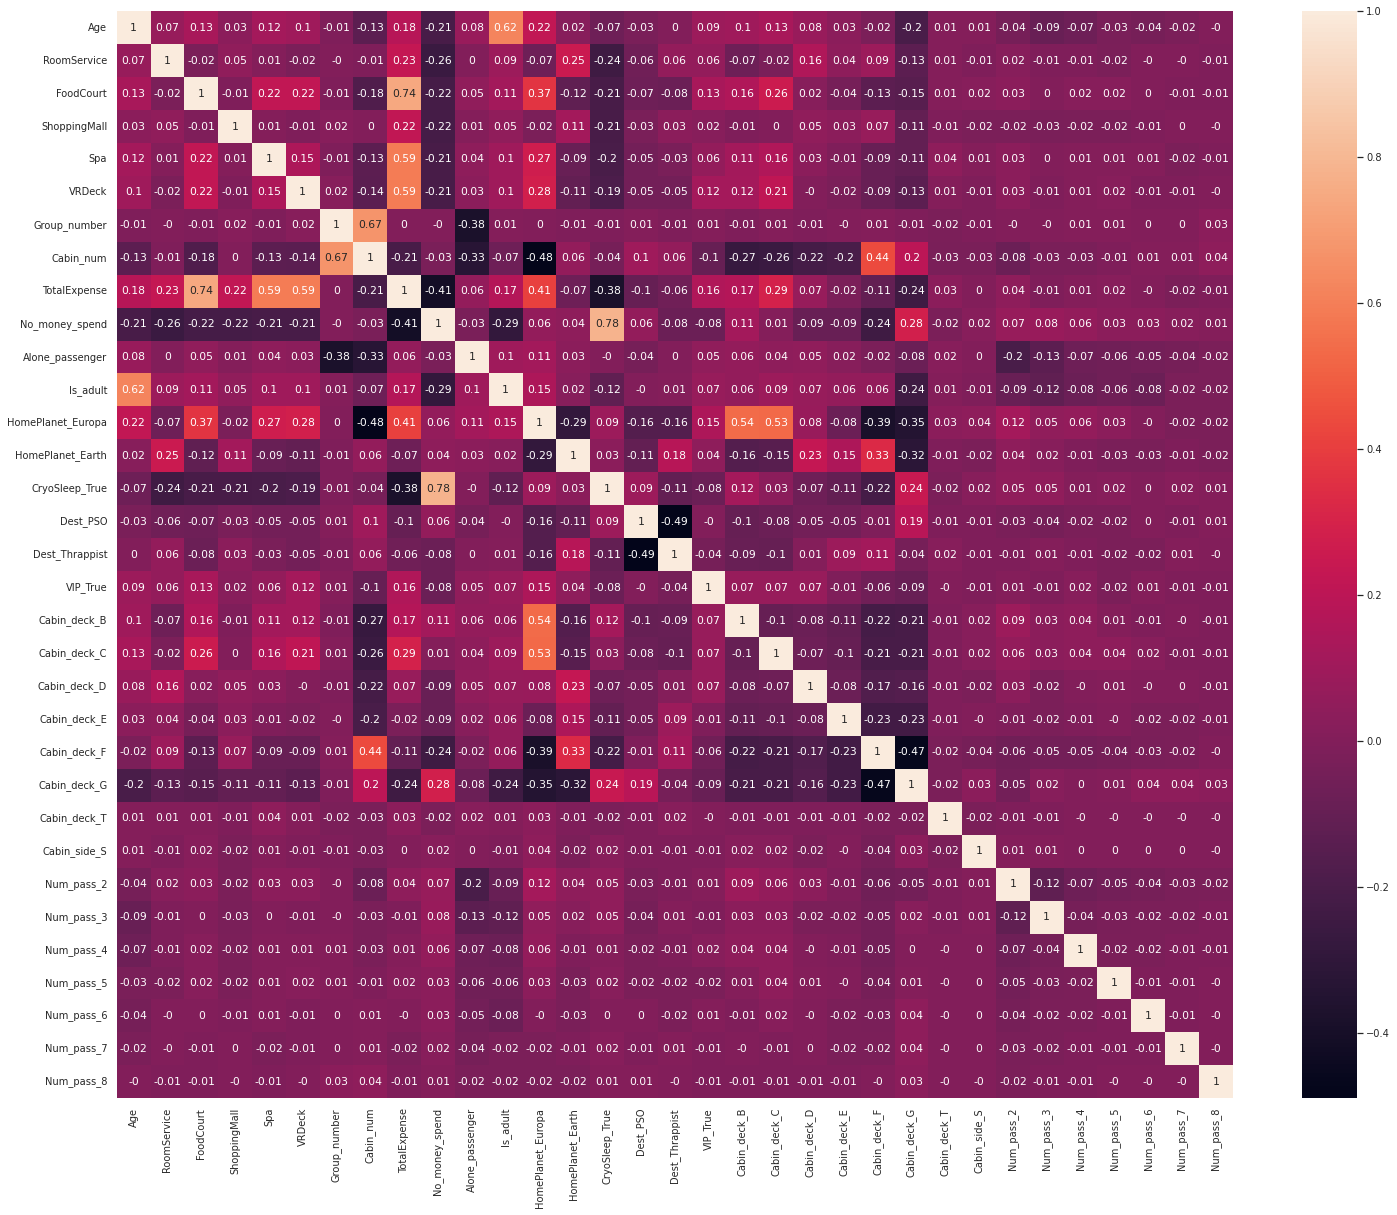

In [57]:
sns.set(font_scale=0.9,rc={"figure.figsize": [25, 20]})
sns.heatmap(train_data.corr().round(2),annot=True);

In [58]:
X = train_data
y = full_train_data['Transported'].astype(int)

<a id="section-nine"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">FEATURE EXTRACTION</h1>
</div>

<a id="fe-one"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:20px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">INTRINSIC METHOD - FEATURE IMPORTANCE THROUGH RANDOM FOREST</h1>
</div>

In [59]:
rf = RandomForestClassifier(n_estimators=1500)
rf.fit(X,y)
rf.score(X,y)

1.0

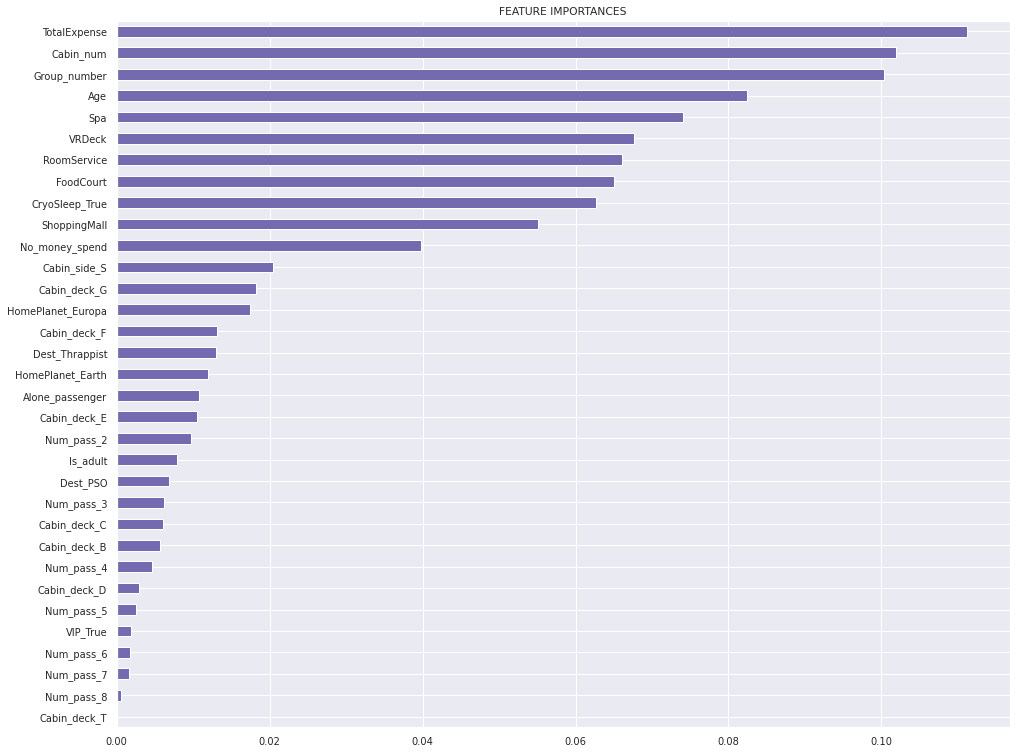

In [60]:
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
forest_importances.nsmallest(len(X.columns)).plot(color='#746AB0',kind='barh',figsize = (16,13)).set_title('FEATURE IMPORTANCES')
plt.show()

<a id="fe-two"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:20px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">WRAPPER METHOD</h1>
</div>

### Recursive Feature Elimination - Cross Validation(RFECV)

In [61]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=18)
rfecv = RFECV(RandomForestClassifier(),cv=cv)
rfecv.fit(X,y)

In [62]:
new_columns = X.columns[rfecv.get_support()]

In [63]:
rfecv_importances = pd.Series(rfecv.estimator_.feature_importances_, index=new_columns)
rfecv_importances.nsmallest(len(new_columns)).plot(color='#FFCC33',kind='barh',figsize = (16,13)).set_title('FEATURE IMPORTANCES USING RFECV')
plt.show()

<a id="section-ten"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">FEATURE SELECTION</h1>
</div>

In [64]:
X = X.drop(['Cabin_deck_T','VIP_True','Num_pass_8','Num_pass_7','Num_pass_6'],axis = 1)

test_data = test_data.drop(['Cabin_deck_T','VIP_True','Num_pass_8','Num_pass_7','Num_pass_6'],axis = 1)

In [65]:
# RESULTS COMPARISON when trained on X_train,y_train and tested on X_test and y_test with classifier as Voting Ensemble 


# WHEN FEATURES ARE NOT CONVERTED TO NORMAL DISTRIBUTION and IMPUTATION is "MEAN" and "MOST_FREQUENT" 
# When removing 4 features     Score - 0.93 28426862925483
# When removing 5 features     Score - 0.93 97424103035878
# When removing 6 features     Score - 0.93 88224471021159

# WHEN FEATURES ARE NOT CONVERTED TO NORMAL DISTRIBUTION and IMPUTATION is "KNNIMPUTER" and "MOST_FREQUENT" 
# When removing 4 features     Score - 0.93 28426862925483
# When removing 5 features     Score - 0.93 97424103035878
# When removing 6 features     Score - 0.93 88224471021159

# WHEN FEATURES ARE NOT CONVERTED TO NORMAL DISTRIBUTION and IMPUTATION is "IterativeImputer" and "MOST_FREQUENT" 
# When removing 4 features     Score - 0.93 28426862925483
# When removing 5 features     Score - 0.93 97424103035878
# When removing 6 features     Score - 0.93 88224471021159

# WHEN FEATURES ARE NOT CONVERTED TO NORMAL DISTRIBUTION and IMPUTATION is "MEDIAN" and "MOST_FREQUENT" 
# When removing 4 features     Score - 0.93 37626494940202
# When removing 5 features     Score - 0.93 60625574977001
# When removing 6 features     Score - 0.93 23827046918123

# WHEN FEATURES ARE NOT CONVERTED TO NORMAL DISTRIBUTION and IMPUTATION is Constant i.e  0 at NAN  and "MOST_FREQUENT"  Score - 0.9328426862925483



# COMPARING RESULTS WHEN FEATURES ARE TRANSFORMED TO NORMAL DISTRIBUTION and comparing the results 
# WHEN FEATURES ARE CONVERTED TO NORMAL DISTRIBUTION nd IMPUTATION is "MEAN" and "MOST_FREQUENT" 
# When removing 3 features     Score -  0.93 56025758969642
# When removing 4 features     Score -  0.93 65225390984361
# When removing 5 features     Score -  0.93 88224471021159

# WHEN FEATURES ARE CONVERTED TO NORMAL DISTRIBUTION nd IMPUTATION is "MEDIAN" and "MOST_FREQUENT" 
# When removing 4 features     Score -  0.93 42226310947562 
# When removing 5 features     Score -  0.93 42226310947562


# OBSERVATIONS
# 'MEAN','KNNIMPUTER' & 'ITERATIVEIMPUTER' Imputation for Numerical giving best Results than "MEDIAN"
# Model is best performing when number of Features removed are 5

### 📌 FINAL OBSERVATION FOR FEATURE SELECTION 📌
##### WE FINALLY Used RFECV(Wrapper Method) and Random Forest(Intrinsic Method) Technique as our deciding factor for selection of best features for our model.
##### RFECV suggested removal of 3 features so we tried and carried out results with removal of 3,4 and 5 features having least contribution to our model.
##### Finally we get that after removal of 5 features leads to best Model with highest accuracy in this model.
##### We did Cross Check of results to get best accuracy out of the model we built.
##### Here we are removing features manually as Number of features are less in this case.

In [66]:
print(X.shape,y.shape,test_data.shape)

(8693, 28) (8693,) (4277, 28)


<a id="section-eleven"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">HYPERPARAMETER TUNING</h1>
</div>

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.32986,random_state = 42)

# Taking the complex test size equivalent to test/train data actually given to us.

Here we are testing our data on several ML alogs with(base parameters) tend to perform good on classification and further selecting few algos for Voting ensemble.
1. Logistic Regression
2. K-Neighors Classifier
3. Gaussian NB 
4. Support Vector Classifier
5. Decision Tree Classifier
6. Extra Tree Classifier
7. Random Forest Classifier
8. Gradient Boost Classifier
9. XGBoost
10. LightGBM
11. CATBoost

In [68]:
classifiers = [LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()
             ,GradientBoostingClassifier(),XGBClassifier(eval_metric='auc'),LGBMClassifier(),CatBoostClassifier(silent = True)]

clf_dict = {0:'Logistic Regression',
           1:'KNN',
           2:'Naive Bayes(Gaussian)',
           3:'SVM',
           4:'Decision Tree Classifier',
           5:'Random Forest',
           6:'Gradient Boost',
           7:'XGBoost Classifier',
           8:'LightGBM',
           9:'CatBoost'}              
    
    
for i, model in enumerate(classifiers):
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print("%s CV SCORE: %f , Standard Deviation: %f" % (clf_dict[i], cv_results.mean(), cv_results.std()))

Logistic Regression CV SCORE: 0.793305 , Standard Deviation: 0.013237
KNN CV SCORE: 0.762568 , Standard Deviation: 0.013510
Naive Bayes(Gaussian) CV SCORE: 0.767040 , Standard Deviation: 0.018483
SVM CV SCORE: 0.788329 , Standard Deviation: 0.017639
Decision Tree Classifier CV SCORE: 0.748675 , Standard Deviation: 0.017442
Random Forest CV SCORE: 0.805841 , Standard Deviation: 0.010266
Gradient Boost CV SCORE: 0.809103 , Standard Deviation: 0.009841
XGBoost Classifier CV SCORE: 0.801030 , Standard Deviation: 0.010486
LightGBM CV SCORE: 0.810128 , Standard Deviation: 0.011971
CatBoost CV SCORE: 0.819225 , Standard Deviation: 0.008978


## Going further Ahead with XGBoost, LightGBM and CatBoost and individually performing HPT using OPTUNA to get even better results with tuning parameters

### XGBOOST CLASSIFIER 

In [69]:
# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators',1500,2000)
#     learning_rate = trial.suggest_uniform('learning_rate',1e-3,1e-2)
#     max_depth = trial.suggest_int('max_depth',3,10)
#     min_child_weight = trial.suggest_int('min_child_rate',1,6)
#     gamma = trial.suggest_float('gamma',0.0,0.5,step = 0.1)
#     clf = XGBClassifier(n_estimators=n_estimators,learning_rate=learning_rate,max_depth=max_depth,eval_metric = 'auc',
#                        min_child_weight=min_child_weight,gamma = gamma)
#     clf.fit(X_train,y_train)

#     r2score = clf.score(X_test,y_test)
    
#     return r2score 


# studyxg = optuna.create_study(direction='maximize')
# studyxg.optimize(objective, n_trials=20)
# trial = studyxg.best_trial

### LightGBM CLASSIFIER

In [70]:
# def objective(trial):
    
#     n_estimators = trial.suggest_int('n_estimators',2000,3000)
#     max_depth = trial.suggest_int('max_depth',10,25)
#     learning_rate = trial.suggest_uniform('learning_rate',1e-3,1e-2)
#     num_leaves = trial.suggest_int('num_leaves',10,90),
#     boosting_type = trial.suggest_categorical('boosting_type',['gbdt','dart'])
#     min_child_samples = trial.suggest_int('min_child_samples',3,20)
#     lgbm = LGBMClassifier(min_child_samples=min_child_samples,learning_rate=learning_rate,
#                            n_estimators=n_estimators,num_leaves=num_leaves,
#                           boosting_type=boosting_type,max_depth=max_depth)
    
#     lgbm.fit(X_train,y_train)

#     r2score = lgbm.score(X_test,y_test)
    
#     return r2score  

# studylg = optuna.create_study(direction='maximize')
# studylg.optimize(objective, n_trials=10)
# trial = studylg.best_trial

# IMPORTANT OBSERVATIONS 
# Tried "goss" also but giving worse results than "dart" and "gbdt"
# Best Learning_rate = [1e-3,1e-2]
# Theoritically - "num_leaves" = 2^("max_depth") but if 'max_depth' is 8-10 then keep 'num_leaves' in 70-80 
# Don't take "num_leaves" too high it will lead to OVERFITTING
# Generally 'num_child_samples'('min_data_in_leaf') has default value as 20 but taking too small will lead to OVERFITTING

### CATBOOST CLASSIFIER

In [71]:
# def objective(trial):
    
#     n_estimators = trial.suggest_int('n_estimators',1000,2000)
#     max_depth = trial.suggest_int('max_depth',8,9)
#     learning_rate = trial.suggest_uniform('learning_rate',1e-2,1e-1)
#     bagging_temperature = trial.suggest_int('bagging_temperature',6,10)
#     bootstrap_type = trial.suggest_categorical('bootstrap_type',['Bayesian','Bernoulli'])
#     #bagging_temperature=bagging_temperature
    
#     ctbc = CatBoostClassifier(bootstrap_type ='Bernoulli',bagging_temperature=bagging_temperature,silent = True,
#                               learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth)
#     ctbc.fit(X_train,y_train)

#     r2score = ctbc.score(X_test,y_test)
#     return r2score  

# studyct = optuna.create_study(direction='maximize')
# studyct.optimize(objective, n_trials=10)
# trial = studyct.best_trial


# IMPORTANT INFORMATION REGARDING RESULTS DISPLAYED BELOW
# When few parameters we Getting cleared then we took them directly and remaining from Optimization as is the results displayed below of various Combination of Parameters


# Learning_rate = [1e-3 to 1e-1] giving BEST results 
# Take n_estimators as small i.e 1000-2000 and when we get all other parameters BEST then for last BEST results use a big estimator value.
# In this case "Bernoulli" gives best answer than 'Bayesian'
# In this case BEST DEPTH came out to be 8 
# In this case we ran and best answers were found in 1000-2000 n_estimators only.

## STRATEGY USED

Using OPTUNA for HPT then after each complete iteration Narrow down the parameters to particular range and then test out the model with best parameters, compare with base estimators and also with parameters which got best results for my notebook till now of results and errors score.

<a id="section-twelve"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">MODEL EVALUATION</h1>
</div>

In [72]:
classifiers = [XGBClassifier(eval_metric='auc'),XGBClassifier(n_estimators=1855,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1),
               LGBMClassifier(),LGBMClassifier(n_estimators=2287,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18),
               CatBoostClassifier(silent = True),CatBoostClassifier(bootstrap_type='Bernoulli',max_depth = 8,learning_rate=0.008,n_estimators=1620,silent = True)]

clf_dict = {0:'XGBoost Classifier with no HPT',
            1:'XGBoost Classifier with Best Parameters',
            2:'LightGBM with no HPT',
            3:'LightGBM with Best Parameters',
            4:'CatBoost with no HPT',
            5:'CatBoost with Best Parameters'}              
    
    
for i, model in enumerate(classifiers):
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print("%s CV SCORE: %f , Standard Deviation: %f" % (clf_dict[i], cv_results.mean(), cv_results.std()))

XGBoost Classifier with no HPT CV SCORE: 0.801030 , Standard Deviation: 0.010486
XGBoost Classifier with Best Parameters CV SCORE: 0.810471 , Standard Deviation: 0.009586
LightGBM with no HPT CV SCORE: 0.810128 , Standard Deviation: 0.011971
LightGBM with Best Parameters CV SCORE: 0.805322 , Standard Deviation: 0.008727
CatBoost with no HPT CV SCORE: 0.819225 , Standard Deviation: 0.008978
CatBoost with Best Parameters CV SCORE: 0.817339 , Standard Deviation: 0.011780


> ### Observations
> 1. As we see XGBoost and LightGBM with Parameters are performing better than Base estimators of their self but Base Catboost estimator still performing better than Catboost with Best Parameters.
> 2. Now, we check the Performance metrics to be clear that models are not OVERFITTING
> 3. Making and comparing Voting Ensemble

In [73]:
classifiers = [XGBClassifier(n_estimators=1855,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1), XGBClassifier(n_estimators=1800,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1),
               LGBMClassifier(n_estimators=2287,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18), LGBMClassifier(n_estimators=2690,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18),
               CatBoostClassifier(silent = True),CatBoostClassifier(bootstrap_type='Bernoulli',max_depth = 8,learning_rate=0.008,n_estimators=1950,silent = True),
              VotingClassifier([('XG Boost', XGBClassifier(n_estimators=1855,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1)),('LightGBM',LGBMClassifier(n_estimators=2287,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18)),('CatboostClassifier',CatBoostClassifier(silent = True))],n_jobs = -1,voting = 'hard'),
              VotingClassifier([('XG Boost', XGBClassifier(n_estimators=1800,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1)),('LightGBM',LGBMClassifier(n_estimators=2690,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18)),('CatboostClassifier',CatBoostClassifier(bootstrap_type='Bernoulli',max_depth = 8,learning_rate=0.008,n_estimators=1950,silent = True))],n_jobs = -1,voting = 'hard')]

clf_dict = {0:'XGBoost with Parameters selected',
            1:'XGBoost with best performing previous model',
            2:'LightGBM with Parameters selected',
            3:'LightGBM with best performing previous model',
            4:'CatBoost with no HPT',
            5:'CatBoost with best performing previous model',
            6:'Voting Classifier with Parameters selected',
            7:'Voting Classifier with best performing previous model'}              
    
    
for i, model in enumerate(classifiers):
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print("%s CV SCORE: %f , Standard Deviation: %f" % (clf_dict[i], cv_results.mean(), cv_results.std()))

XGBoost with Parameters selected CV SCORE: 0.810471 , Standard Deviation: 0.009586
XGBoost with best performing previous model CV SCORE: 0.810470 , Standard Deviation: 0.009994
LightGBM with Parameters selected CV SCORE: 0.805322 , Standard Deviation: 0.008727
LightGBM with best performing previous model CV SCORE: 0.804121 , Standard Deviation: 0.010326
CatBoost with no HPT CV SCORE: 0.819225 , Standard Deviation: 0.008978
CatBoost with best performing previous model CV SCORE: 0.816309 , Standard Deviation: 0.011783
Voting Classifier with Parameters selected CV SCORE: 0.813559 , Standard Deviation: 0.009163
Voting Classifier with best performing previous model CV SCORE: 0.809955 , Standard Deviation: 0.009636


> #### Observations
> 1. From results it is evident that new selected Parameters are performing better than previous best model so now comparing error scores of these 2 models
> 2. In this as I have already submitted many solutions to this exercise I was able to achieve a decent enough score to take that as a reference and then superseed that result to get better results through these parameters

### Performance Metrics Comparison

In [74]:
xgbc = XGBClassifier(n_estimators=1800,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1)
lgb = LGBMClassifier(n_estimators=2690,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18)
cat = CatBoostClassifier(bootstrap_type='Bernoulli',max_depth = 8,learning_rate=0.008,n_estimators=1950,silent = True)
model = [('XG Boost', xgbc),('LightGBM',lgb),('CatboostClassifier',cat)]
voting_classifier = VotingClassifier(estimators=model,voting = 'hard')

voting_classifier.fit(X_train,y_train)


VotingClassifier(estimators=[('XG Boost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='auc', gamma=0.1,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.008, max_bi...
                                            missing=nan,
                                            monotone_const

In [75]:
#Accuracy for Train
print("Accuracy Score for Train : ",accuracy_score(y_pred=voting_classifier.predict(X_train),y_true=y_train))

# Accuracy for test
print("Accuracy Score for Test : ",accuracy_score(y_pred=voting_classifier.predict(X_test),y_true=y_test))

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(y_pred=voting_classifier.predict(X_test),y_true=y_test))

# Precision Score
print("Precision Score : ", precision_score(y_pred=voting_classifier.predict(X_test),y_true=y_test))

# F1 Score
print("F1 Score : ", f1_score(y_pred=voting_classifier.predict(X_test),y_true=y_test))

# r2 Score
print("R2 Score : ", r2_score(y_pred=voting_classifier.predict(X_test),y_true=y_test))

# MSE
print("Mean Squared Error(MSE) : ", mean_squared_error(y_pred=voting_classifier.predict(X_test),y_true=y_test))

# Log-loss
print("Log-Loss : ", log_loss(y_pred=voting_classifier.predict(X_test),y_true=y_test))

Accuracy Score for Train :  0.9198283261802576
Accuracy Score for Test :  0.808228730822873
Confusion Matrix : 
 [[1131  293]
 [ 257 1187]]
Precision Score :  0.802027027027027
F1 Score :  0.8119015047879617
R2 Score :  0.23287761835102228
Mean Squared Error(MSE) :  0.19177126917712692
Log-Loss :  6.623626673377936


In [78]:
xgb = XGBClassifier(n_estimators=1855,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1)
lgbm = LGBMClassifier(n_estimators=2287,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18)
cbc = CatBoostClassifier(silent = True)
models = [('XG Boost', xgb),('LightGBM',lgbm),('CatboostClassifier',cbc)]
voting = VotingClassifier(estimators=models,voting = 'hard')

voting.fit(X_train,y_train)


VotingClassifier(estimators=[('XG Boost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='auc', gamma=0.1,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.008, max_bi...
                                            missing=nan,
                                            monotone_const

In [79]:
#Accuracy for Train
print("Accuracy Score for Train : ",accuracy_score(y_pred=voting.predict(X_train),y_true=y_train))

# Accuracy for test
print("Accuracy Score for Test : ",accuracy_score(y_pred=voting.predict(X_test),y_true=y_test))

# Confusion Matrix
print("Confusion Matrix : \n",confusion_matrix(y_pred=voting.predict(X_test),y_true=y_test))

# Precision Score
print("Precision Score : ", precision_score(y_pred=voting.predict(X_test),y_true=y_test))

# F1 Score
print("F1 Score : ", f1_score(y_pred=voting.predict(X_test),y_true=y_test))

# r2 Score
print("R2 Score : ", r2_score(y_pred=voting.predict(X_test),y_true=y_test))

# MSE
print("Mean Squared Error(MSE) : ", mean_squared_error(y_pred=voting.predict(X_test),y_true=y_test))

# Log-loss
print("Log-Loss : ", log_loss(y_pred=voting.predict(X_test),y_true=y_test))

Accuracy Score for Train :  0.9000858369098712
Accuracy Score for Test :  0.8075313807531381
Confusion Matrix : 
 [[1134  290]
 [ 262 1182]]
Precision Score :  0.8029891304347826
F1 Score :  0.8106995884773662
R2 Score :  0.23008808241775325
Mean Squared Error(MSE) :  0.19246861924686193
Log-Loss :  6.647711455106504


<a id="section-thirteen"></a>

<div style="display:block;
           border: 1.5px outset orange;
           border-radius: 50px 60px 50px;
           background-color:#E1F8DC;">

<h1 style="color:teal;
          font-size:22px;
          font-family:sans-serif;
          letter-spacing:0.9px;
          text-align:center">FINAL MODEL CREATION AND EXPORTING RESULTS</h1>
</div>

In [ ]:
xgb = XGBClassifier(n_estimators=1855,max_depth=5,eval_metric='auc',learning_rate=0.008,min_child_weight = 4,gamma = 0.1)
lgbm = LGBMClassifier(n_estimators=2287,learning_rate=0.003,boosting_type='gbdt',max_depth=12,num_leaves=62,min_child_samples=18)
cbc = CatBoostClassifier(silent = True)
models = [('XG Boost', xgb),('LightGBM',lgbm),('CatboostClassifier',cbc)]
voting_final = VotingClassifier(estimators=models,voting = 'hard')

voting_final.fit(X,y)

In [1]:
group_names = ['True Negative','False Positive','False Negative','True Positive']

group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix(y_pred=voting_final.predict(X_test),y_true=y_test).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_pred=voting_final.predict(X_test),y_true=y_test).flatten()/np.sum(confusion_matrix(y_pred=voting_final.predict(X_test),y_true=y_test))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_pred=voting_final.predict(X_test),y_true=y_test), annot=labels, fmt='', cmap='Accent')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Reference - StackOverflow, AnalyticsVidya, TowardsDataScience 

NameError: name 'plt' is not defined

<!-- [I 2022-09-05 20:02:22,767] A new study created in memory with name: no-name-8e9b98d5-1747-48be-9341-eba1847e4682
[I 2022-09-05 20:02:26,255] Trial 0 finished with value: 0.8054277828886844 and parameters: {'n_estimators': 606, 'criterion': 'gini', 'max_features': 'log2'}. Best is trial 0 with value: 0.8054277828886844.
[I 2022-09-05 20:02:31,781] Trial 1 finished with value: 0.8077276908923643 and parameters: {'n_estimators': 987, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 1 with value: 0.8077276908923643.
[I 2022-09-05 20:02:39,408] Trial 2 finished with value: 0.8114075436982521 and parameters: {'n_estimators': 1196, 'criterion': 'entropy', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8114075436982521.
[I 2022-09-05 20:02:44,349] Trial 3 finished with value: 0.8077276908923643 and parameters: {'n_estimators': 708, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 2 with value: 0.8114075436982521.
[I 2022-09-05 20:02:50,922] Trial 4 finished with value: 0.8026678932842686 and parameters: {'n_estimators': 1040, 'criterion': 'gini', 'max_features': 'log2'}. Best is trial 2 with value: 0.8114075436982521.
[I 2022-09-05 20:02:54,592] Trial 5 finished with value: 0.8095676172953082 and parameters: {'n_estimators': 608, 'criterion': 'entropy', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8114075436982521.
[I 2022-09-05 20:02:58,054] Trial 6 finished with value: 0.8086476540938362 and parameters: {'n_estimators': 600, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 2 with value: 0.8114075436982521.
[I 2022-09-05 20:03:03,663] Trial 7 finished with value: 0.8068077276908924 and parameters: {'n_estimators': 946, 'criterion': 'entropy', 'max_features': 'log2'}. Best is trial 2 with value: 0.8114075436982521.
[I 2022-09-05 20:03:07,353] Trial 8 finished with value: 0.8095676172953082 and parameters: {'n_estimators': 609, 'criterion': 'gini', 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8114075436982521.
[I 2022-09-05 20:03:12,445] Trial 9 finished with value: 0.8091076356945722 and parameters: {'n_estimators': 851, 'criterion': 'gini', 'max_features': 'log2'}. Best is trial 2 with value: 0.8114075436982521. -->


In [ ]:
submission

In [ ]:
submission.drop('Transported',axis=1,inplace = True)

In [ ]:
submission['Transported'] = voting_final.predict(test_data)

In [ ]:
submission['Transported'].replace(inplace=True, to_replace=(1,0), value=(True,False))

In [ ]:
submission

In [ ]:
submission.to_csv('/kaggle/working/Voting_Classifier_Final.csv',index=False)

## If you appreciate my work please feel free to upvote ⬆️
## If any suggestions or questions please post in the comment section will discuss them in detail.
## Follow me on Kaggle 😊